In [17]:
import numpy as np
Y = 3
Y = np.log1p(Y)
back = np.expm1(Y)

print(Y)
print(back)

1.3862943611198906
3.0


In [3]:
from matplotlib.pyplot import axis
import pandas as pd


df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

def add_one(x):
    return x + 1

df['C'] = df.apply(lambda x: add_one(x['A']), axis=1)

df

,A,B,C
0,1,4,2
1,2,5,3
2,3,6,4


In [4]:
stores_train = pd.read_csv('data/stores_train.csv')
stores_extra = pd.read_csv('data/stores_extra.csv')

In [5]:
def convert_to_category(X):
    for col in X.columns:
        
        if (X[col].dtype != 'int64') and (X[col].dtype != 'float64') and (X[col].dtype != 'bool'):
            X[col] = X[col].astype('category')
            
    return X

<AxesSubplot: >

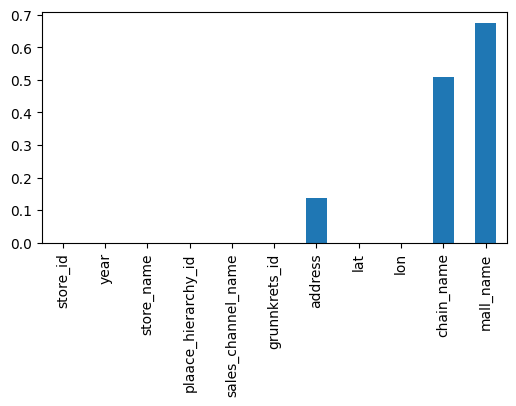

In [7]:
stores_train_copy = stores_train.copy()
stores_extra_copy = stores_extra.copy()

split_index = stores_train_copy.shape[0]-1

stores_train_copy.drop(columns=['revenue'], inplace=True)

total_stores = pd.concat([stores_train_copy, stores_extra_copy], axis=0)

total_stores.reset_index(drop=True, inplace=True)
total_stores

total_stores = convert_to_category(total_stores)

total_stores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
total_stores.isna().mean().plot.bar(ax=ax)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(total_stores)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

df_imputed

In [15]:
busstops = pd.read_csv('data/busstops_norway.csv')
busstops.head()


busstops['busstop_lat'] = busstops['geometry'].apply(lambda x: float(x.split(' ')[0][6:]))
busstops['busstop_lon'] = busstops['geometry'].apply(lambda x: float(x.split(' ')[1][:-1]))

busstops

# find closest busstop to each store in stores_train

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

import enum
import haversine as hs
def haversine_distance(lat1, lon1, lat2, lon2):
    return hs.haversine((lat1, lon1), (lat2, lon2), unit=hs.Unit.KILOMETERS)

def find_closest_busstop(lat, lon):
    distances = busstops.apply(lambda x: haversine_distance(lat, lon, x['busstop_lat'], x['busstop_lon']), axis=1)
    return distances.min()

#stores_train['closest_busstop_distance'] = stores_train.apply(lambda x: find_closest_busstop(x['lat'], x['lon']), axis=1)



In [12]:
stores_train.to_csv('data/stores_train_with_busstops.csv', index=False)

In [16]:
stores_train

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,closest_busstop_distance
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,66.270890
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,65.875284
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,66.416350
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,66.435015
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,67.817510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,NaN,0.088,65.877972
12855,917921733-917982368-868081,2016,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5020406,NaN,60.799991,10.693635,GULATING GRUPPEN,CC Gjøvik,1.816,66.317146
12856,911721961-911764474-496764,2016,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,59.946562,11.007659,GULATING GRUPPEN,Strømmen Storsenter,38.225,65.646359
12857,914337046-914343372-721294,2016,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,58.850261,5.735674,NaN,Bystasjonen,3.642,69.921842


In [ ]:
# contact Mathuran
# contact Pillai